In [ ]:
from google.colab import files
upload = files.upload()

Saving wallets.csv to wallets.csv


In [ ]:
import requests
import time
import math
import pandas as pd

API_KEY = 'api_key_here'

def get_tx_count(wallet):
    url = "https://api.etherscan.io/api"
    params = {
        "module": "proxy",
        "action": "eth_getTransactionCount",
        "address": wallet,
        "tag": "latest",
        "apikey": API_KEY
    }
    try:
        response = requests.get(url, params=params)
        data = response.json()
        if data.get('result'):
            tx_count = int(data['result'], 16)
            return tx_count
        else:
            print(f"Warning: No result for wallet {wallet} - {data}")
            return 0
    except Exception as e:
        print(f"Error fetching tx count for {wallet}: {e}")
        return 0

def normalize_log_scores(tx_counts):
    log_counts = [math.log(c + 1) for c in tx_counts]
    max_log = max(log_counts)
    min_log = min(log_counts)
    if max_log == min_log:
        return [500] * len(tx_counts)
    scores = [int((lc - min_log) / (max_log - min_log) * 1000) for lc in log_counts]
    return scores

def main():
    # Read wallets from CSV
    df = pd.read_csv('wallets.csv')
    wallets = df['wallet_id'].tolist()
    print(f"Loaded {len(wallets)} wallets from wallet.csv")

    tx_counts = []
    for idx, wallet in enumerate(wallets, start=1):
        print(f"Processing wallet {idx}/{len(wallets)}: {wallet}")
        tx_count = get_tx_count(wallet)
        tx_counts.append(tx_count)
        time.sleep(0.5)  # Sleep to respect rate limits

    scores = normalize_log_scores(tx_counts)

    # Add tx_count and score to dataframe
    df['tx_count'] = tx_counts
    df['score'] = scores

    # Save results
    df.to_csv('wallet_scores.csv', index=False)
    print("Scores saved to wallet_scores.csv")

if __name__ == "__main__":
    main()


Loaded 103 wallets from wallet.csv
Processing wallet 1/103: 0x0039f22efb07a647557c7c5d17854cfd6d489ef3
Processing wallet 2/103: 0x06b51c6882b27cb05e712185531c1f74996dd988
Processing wallet 3/103: 0x0795732aacc448030ef374374eaae57d2965c16c
Processing wallet 4/103: 0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9
Processing wallet 5/103: 0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae
Processing wallet 6/103: 0x104ae61d8d487ad689969a17807ddc338b445416
Processing wallet 7/103: 0x111c7208a7e2af345d36b6d4aace8740d61a3078
Processing wallet 8/103: 0x124853fecb522c57d9bd5c21231058696ca6d596
Processing wallet 9/103: 0x13b1c8b0e696aff8b4fee742119b549b605f3cbc
Processing wallet 10/103: 0x1656f1886c5ab634ac19568cd571bc72f385fdf7
Processing wallet 11/103: 0x1724e16cb8d0e2aa4d08035bc6b5c56b680a3b22
Processing wallet 12/103: 0x19df3e87f73c4aaf4809295561465b993e102668
Processing wallet 13/103: 0x1ab2ccad4fc97c9968ea87d4435326715be32872
Processing wallet 14/103: 0x1c1b30ca93ef57452d53885d97a74f61daf2bf4f
Processi

In [1]:
from google.colab import files
upload = files.upload()

Saving wallet_scores (2).csv to wallet_scores (2).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('wallet_scores (2).csv')

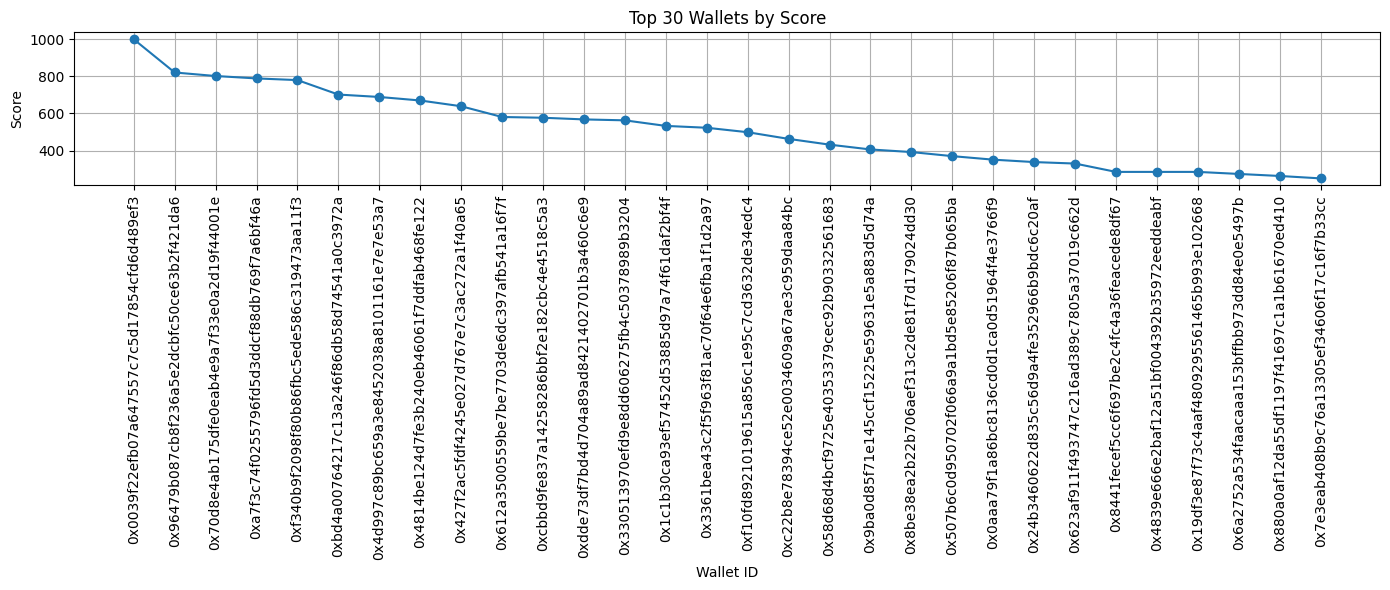

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV data
df = pd.read_csv('wallet_scores (2).csv')

# Sort by score and take top N
top_n = 30  # change N as desired
top_wallets = df.sort_values(by='score', ascending=False).head(top_n)

# Line chart
plt.figure(figsize=(14, 6))
plt.plot(top_wallets['wallet_id'], top_wallets['score'], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.title(f'Top {top_n} Wallets by Score')
plt.xlabel('Wallet ID')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()


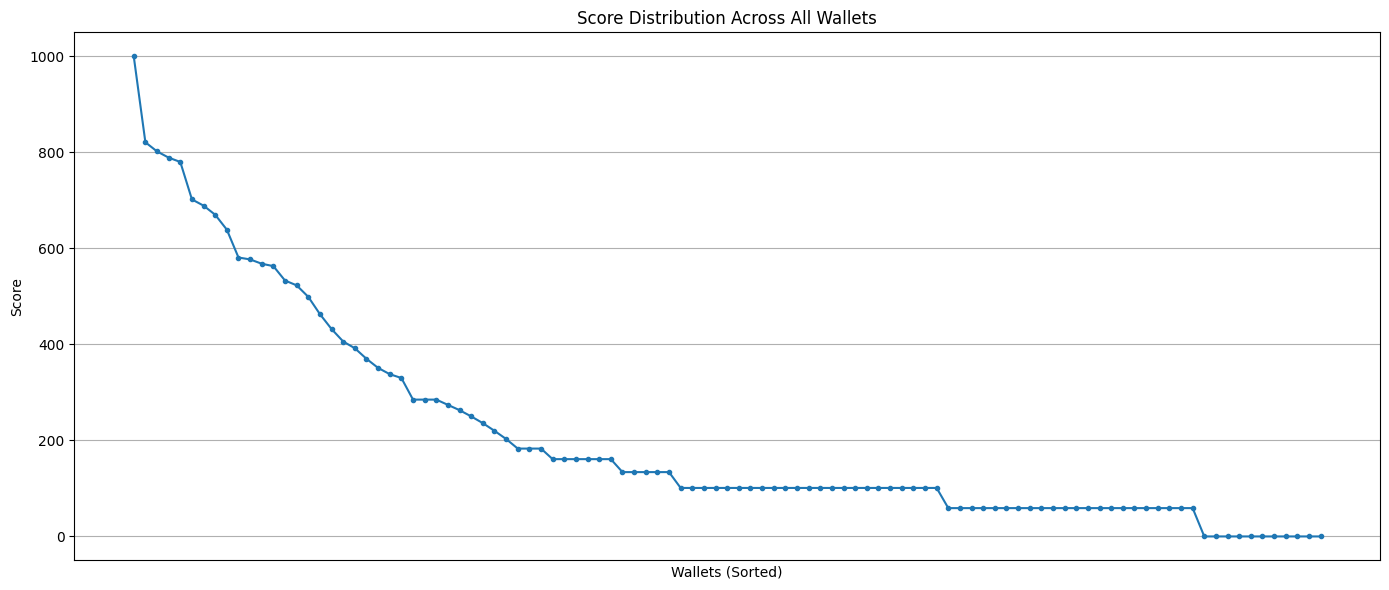

In [3]:
# Sort by score (optional: filter to a reasonable range)
df_sorted = df.sort_values(by='score', ascending=False)

plt.figure(figsize=(14, 6))
plt.plot(df_sorted['wallet_id'], df_sorted['score'], linestyle='-', marker='.')
plt.xticks([], [])  # Hide x-ticks if too many
plt.title('Score Distribution Across All Wallets')
plt.xlabel('Wallets (Sorted)')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()


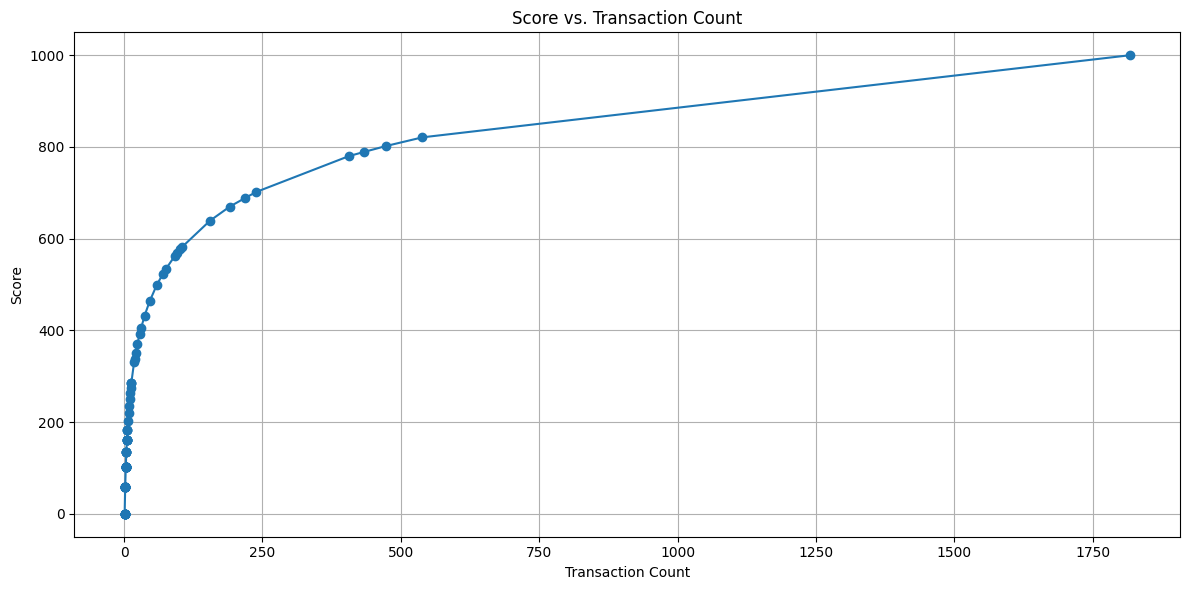

In [4]:
# Sort by tx_count for trend
df_sorted_tx = df.sort_values(by='tx_count')

plt.figure(figsize=(12, 6))
plt.plot(df_sorted_tx['tx_count'], df_sorted_tx['score'], marker='o', linestyle='-')
plt.title('Score vs. Transaction Count')
plt.xlabel('Transaction Count')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()
